# Mohta Rahul Suresh TSF internship

# Simple Linear Regression from scratch

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/)


========================================================================================================================

In [ ]:
!wget http://bit.ly/w-data
!mv w-data student_scores.csv

## import libraries

In [89]:
import csv
from random import seed
from random import randrange
from math import sqrt
import matplotlib.pyplot as plt  
%matplotlib inline

## Load data from CSV file

In [90]:
with open('student_scores.csv') as file:
    dic=csv.DictReader(file)
    Hours,Scores=[],[]
    for row in dic:
        Hours.append(float(row['Hours']))
        Scores.append(float(row['Scores']))

print(Hours)
dataset=list(zip(Hours,Scores))
dataset

[2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5, 3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8]


[(2.5, 21.0),
 (5.1, 47.0),
 (3.2, 27.0),
 (8.5, 75.0),
 (3.5, 30.0),
 (1.5, 20.0),
 (9.2, 88.0),
 (5.5, 60.0),
 (8.3, 81.0),
 (2.7, 25.0),
 (7.7, 85.0),
 (5.9, 62.0),
 (4.5, 41.0),
 (3.3, 42.0),
 (1.1, 17.0),
 (8.9, 95.0),
 (2.5, 30.0),
 (1.9, 24.0),
 (6.1, 67.0),
 (7.4, 69.0),
 (2.7, 30.0),
 (4.8, 54.0),
 (3.8, 35.0),
 (6.9, 76.0),
 (7.8, 86.0)]

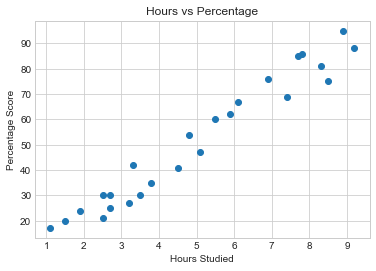

In [91]:

plt.plot(Hours,Scores,"o")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


**First we will get the RMSE value to see how accurate our model is with test_train split.
Then we would train the model with entire dataset to get the predicted value of how much would a student score if he studied 9.25 hours a day.**


This is an equation of a line or a simple linear regression

y = b0 + b1 * x

To get b0 and b1 the curve fitting method formula is shown below,

b1 = sum((xi - mean(x)) * (yi - mean(y))) / (xi - mean(x))^2

   = covariance(x,y) / variance(x)

b0 = mean(y) - b1* mean(x)


## Defining utility functions

In [92]:
seed(1)

def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

def train_test_split(dataset, split=0.60):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    test=dataset_copy
    return train,test


def mean(values):
    return sum(values)/len(values)

def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar


def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]


def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        y = b0 + b1 * row[0]
        predictions.append(y)
    return predictions

# uses up all these above functions and gives us the end result value of rmse metric

def evaluate_rmse(dataset,split=0.6):
    train, test = train_test_split(dataset,split)
    test_set = list()
    for row in test:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = simple_linear_regression(train, test_set)
    actual = [row[-1] for row in test]
    rmse = rmse_metric(actual, predicted)
    return rmse


evaluate_rmse(dataset)

5.897422719636866

92.90985477015732


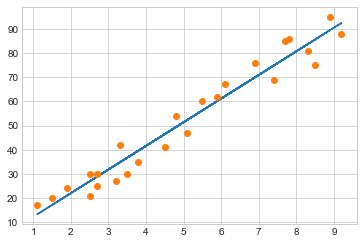

In [95]:
import numpy as np

b0,b1=coefficients(dataset)
score=b1*9.25+b0

plt.plot(np.array(Hours),b1*np.array(Hours)+b0)
plt.plot(Hours,Scores,"o")
print(score)